In [42]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import linregress
from scipy.stats import linregress
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
#import the API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
import time

In [10]:
# Create a set of random latitude and longitude combinations.
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
   # if the city is unique then we will add it to the cities list
    if city not in cities:
        cities.append(city)
 #   print the city count to confirm sufficient count
len(cities)

619

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in set s of 50 for logging purposes
    if(i % 50==0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url=url+"&q="+city.replace(" ","+")
    
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
   # add 1 to the record count
    record_count+=1
    
    try:
        #parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
        #parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
       
        #convert the date to iso standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append the city data to the city data list
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity": city_humidity,
                         "cloudiness": city_clouds,
                         "wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        #if an error occurs skip the city
    except:
        print("City not found. skiping...")
        pass
    #indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
            
        
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | ushuaia
Processing Record 2 of set 1 | rawannawi
City not found. skiping...
Processing Record 3 of set 1 | colac
Processing Record 4 of set 1 | touros
Processing Record 5 of set 1 | hasaki
Processing Record 6 of set 1 | cape town
Processing Record 7 of set 1 | victoria
Processing Record 8 of set 1 | bambous virieux
Processing Record 9 of set 1 | taolanaro
City not found. skiping...
Processing Record 10 of set 1 | ribeira grande
Processing Record 11 of set 1 | atuona
Processing Record 12 of set 1 | port elizabeth
Processing Record 13 of set 1 | tuktoyaktuk
Processing Record 14 of set 1 | butaritari
Processing Record 15 of set 1 | torbay
Processing Record 16 of set 1 | yuryevets
Processing Record 17 of set 1 | palmer
Processing Record 18 of set 1 | vaini
Processing Record 19 of set 1 | bethel
Processing Record 20 of set 1 | olafsvik
Processing Record 21 of set 1 | hermanus
Processing Record 22 of s

Processing Record 35 of set 4 | prince rupert
Processing Record 36 of set 4 | isla vista
Processing Record 37 of set 4 | saint-prosper
Processing Record 38 of set 4 | taoudenni
Processing Record 39 of set 4 | madras
Processing Record 40 of set 4 | sao filipe
Processing Record 41 of set 4 | lebu
Processing Record 42 of set 4 | asau
Processing Record 43 of set 4 | upernavik
Processing Record 44 of set 4 | araxa
Processing Record 45 of set 4 | honningsvag
Processing Record 46 of set 4 | kungsbacka
Processing Record 47 of set 4 | nouadhibou
Processing Record 48 of set 4 | gasa
Processing Record 49 of set 4 | balkanabat
Processing Record 50 of set 4 | north bend
Processing Record 1 of set 5 | axim
Processing Record 2 of set 5 | mys shmidta
City not found. skiping...
Processing Record 3 of set 5 | panalingaan
Processing Record 4 of set 5 | san carlos de bariloche
Processing Record 5 of set 5 | trincomalee
Processing Record 6 of set 5 | udachnyy
Processing Record 7 of set 5 | jiuquan
Processi

Processing Record 29 of set 8 | samusu
City not found. skiping...
Processing Record 30 of set 8 | kahului
Processing Record 31 of set 8 | zaozerne
Processing Record 32 of set 8 | colares
Processing Record 33 of set 8 | camenca
Processing Record 34 of set 8 | yuzhnyy
Processing Record 35 of set 8 | severo-kurilsk
Processing Record 36 of set 8 | grindavik
Processing Record 37 of set 8 | am timan
Processing Record 38 of set 8 | alyangula
Processing Record 39 of set 8 | cabo rojo
Processing Record 40 of set 8 | hambantota
Processing Record 41 of set 8 | numazu
Processing Record 42 of set 8 | fairbanks
Processing Record 43 of set 8 | ashcroft
Processing Record 44 of set 8 | artyk
City not found. skiping...
Processing Record 45 of set 8 | nuevo progreso
Processing Record 46 of set 8 | pacific grove
Processing Record 47 of set 8 | bubaque
Processing Record 48 of set 8 | khandyga
Processing Record 49 of set 8 | macau
Processing Record 50 of set 8 | goundam
Processing Record 1 of set 9 | kamais

Processing Record 17 of set 12 | nizhniy lomov
Processing Record 18 of set 12 | oriximina
Processing Record 19 of set 12 | evensk
Processing Record 20 of set 12 | sistranda
Processing Record 21 of set 12 | puri
Processing Record 22 of set 12 | kaseda
Processing Record 23 of set 12 | west helena
Processing Record 24 of set 12 | kargapolye
City not found. skiping...
Processing Record 25 of set 12 | rurrenabaque
Processing Record 26 of set 12 | erenhot
Processing Record 27 of set 12 | vanimo
Processing Record 28 of set 12 | kholodnyy
Processing Record 29 of set 12 | skibbereen
Processing Record 30 of set 12 | mayari
City not found. skiping...
Processing Record 31 of set 12 | santa maria
Processing Record 32 of set 12 | port blair
Processing Record 33 of set 12 | fomboni
Processing Record 34 of set 12 | chanute
Processing Record 35 of set 12 | westport
Processing Record 36 of set 12 | hattiesburg
Processing Record 37 of set 12 | puerto ayacucho
Processing Record 38 of set 12 | san-pedro
Pr

In [22]:
#convert the array of dictionaries to a pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,cloudiness,wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,47.86,53,20,12.66,AR,2021-10-28 00:12:03
1,Colac,-38.3333,143.5833,66.16,61,39,3.36,AU,2021-10-28 00:12:03
2,Touros,-5.1989,-35.4608,79.59,76,4,16.75,BR,2021-10-28 00:12:03
3,Hasaki,35.7333,140.8333,62.82,62,100,14.09,JP,2021-10-28 00:12:04
4,Cape Town,-33.9258,18.4232,63.88,85,40,6.91,ZA,2021-10-28 00:08:52
5,Victoria,22.2855,114.1577,78.33,79,86,1.01,HK,2021-10-28 00:07:49
6,Bambous Virieux,-20.3428,57.7575,71.22,69,3,8.39,MU,2021-10-28 00:12:04
7,Ribeira Grande,38.5167,-28.7000,68.14,75,98,17.60,PT,2021-10-28 00:12:05
8,Atuona,-9.8000,-139.0333,77.61,70,6,14.67,PF,2021-10-28 00:12:05
9,Port Elizabeth,-33.9180,25.5701,66.00,82,100,16.40,ZA,2021-10-28 00:12:05


In [23]:
new_column_order=["City", "Country","Date","Lat","Lng","Max Temp","Humidity","cloudiness", "wind Speed"]
city_data_df=city_data_df[new_column_order]

In [25]:
#create output file (CSV)
output_data_file="weather_data/cities.csv"
#export the citydata into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["cloudiness"]
wind_speed = city_data_df["wind Speed"]

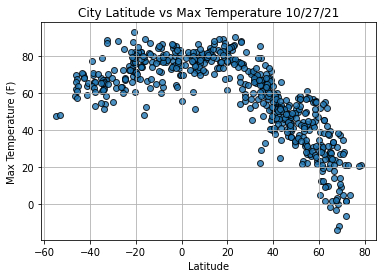

In [31]:
#Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

#incorporate the other graph properites
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
          
          #save the figure
          
plt.savefig("weather_data/Fig1.png")
          
          #show plot
plt.show()

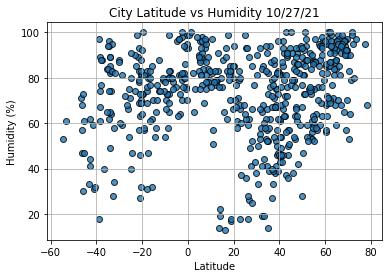

In [32]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

#incorporate the other graph properites
plt.title(f"City Latitude vs Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
          #save the figure
          
plt.savefig("weather_data/Fig2.png")
          
          #show plot
plt.show()

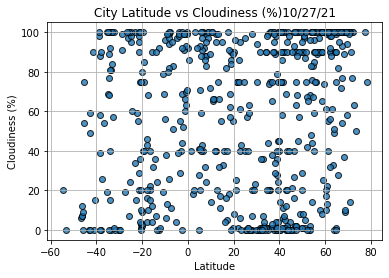

In [33]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

#incorporate the other graph properites
plt.title(f"City Latitude vs Cloudiness (%)"+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
          #save the figure
          
plt.savefig("weather_data/Fig3.png")
          
          #show plot
plt.show()

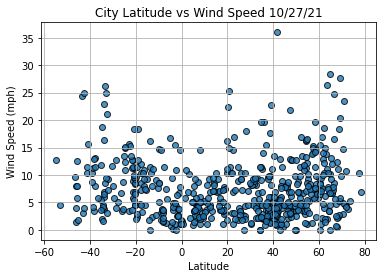

In [34]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o", alpha=.8, label="Cities")

#incorporate the other graph properites
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
          
          #save the figure
          
plt.savefig("weather_data/Fig4.png")
          
          #show plot
plt.show()

In [37]:

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere weather data
    (slope,intercept, r_value, p_value, std_err)=linregress(x_values,y_values )
    
    #calculate the regression line "y values" from the slope and intercept 
    regress_values =x_values*slope+intercept
    
    #get the equation of the line
    line_eq="y = "+str(round(slope,2))+"x+ "+str(round(intercept,2))
    
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
northern_hemi_df =city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

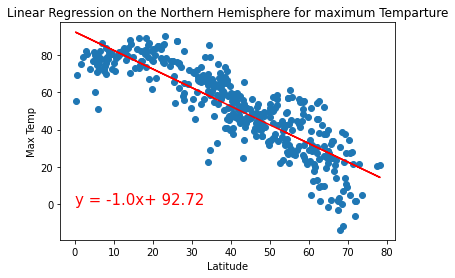

In [44]:
#linear regression on the northern hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

#Call the funciotn
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for maximum Temparture','Max Temp',(0,0))

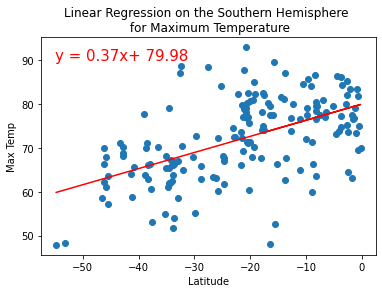

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

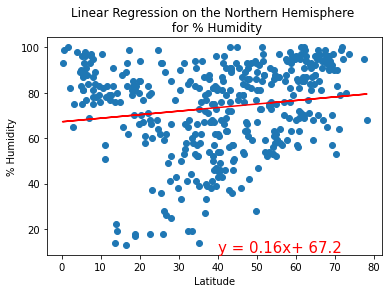

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

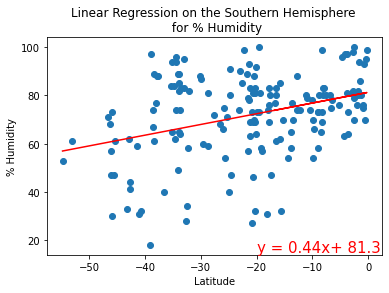

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-20,15))

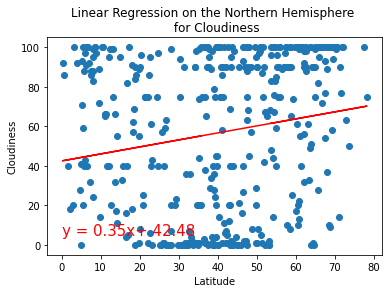

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,5))

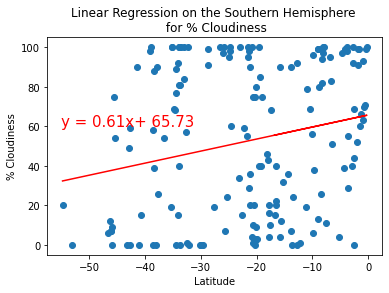

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,60))

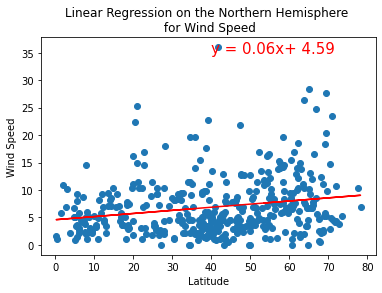

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

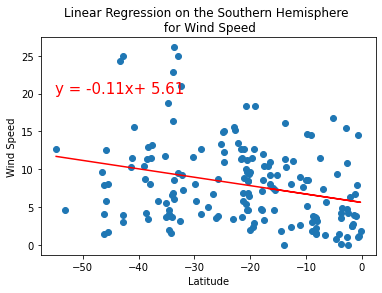

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,20))